# New York Times exercise

The objective is to study the click behavior of people over time and establish useful segments for this purpose.

## Import libraries and dependencies

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
plt.style.use('ggplot')
mpl.rcParams['agg.path.chunksize'] = 10000

## Loading the data of a single day

In [2]:
url_1 = 'http://stat.columbia.edu/~rachel/datasets/nyt1.csv'
data1 = pd.read_csv(url_1, skiprows=1, header=None)
col_names = ['Age', 'Gender', 'Impressions', 'Clicks', 'Signed_In']
data1.columns = col_names

In [3]:
data1.head()

,Age,Gender,Impressions,Clicks,Signed_In
0,36,0,3,0,1
1,73,1,3,0,1
2,30,0,3,0,1
3,49,1,3,0,1
4,47,1,11,0,1


### Mapping the data to the day it belongs to

In [4]:
data1['date'] = '2012/5/1'
data1.head()

,Age,Gender,Impressions,Clicks,Signed_In,date
0,36,0,3,0,1,2012/5/1
1,73,1,3,0,1,2012/5/1
2,30,0,3,0,1,2012/5/1
3,49,1,3,0,1,2012/5/1
4,47,1,11,0,1,2012/5/1


## Cleaning data
Erasing all observations where people clicked with no impressions.

### Removing people with 0 impressions

In [5]:
(data1['Impressions']==0).sum()

3066

This means there were 3066 observations of people that were not showed impressions.

In [6]:
no_imps = data1[data1['Impressions']==0]
no_imps.Clicks.value_counts()

0    3066
Name: Clicks, dtype: int64

This indicates that people that weren't shown impressions neither clicked. Therefore, these observations can be removed from our data.

In [7]:
data1 = data1[data1['Impressions']>0]

In [8]:
data1.Impressions.value_counts()

5     80477
4     80303
6     66808
3     64121
7     48066
2     38433
8     30081
9     16965
1     15483
10     8357
11     3771
12     1549
13      647
14      211
15       64
16       25
17       11
18        2
20        1
Name: Impressions, dtype: int64

This confirms that there are just observations with one or more impressions now.

### Gender in strings

The gender is classified with `1` equals male and `0` equals female. Let's change these numeric values to strings that are more descriptive.

After that, let's change the type of `Gender` column from `object` to `category`.

In [9]:
data1.Gender.value_counts()

0    288229
1    167146
Name: Gender, dtype: int64

In [10]:
data1['Gender'] = data1.Gender.apply(lambda x: 'male' if x else 'female')
data1.Gender.value_counts()

female    288229
male      167146
Name: Gender, dtype: int64

Here, the count of males and females shows that there are almost **twice** females. This is a mistake because when people do not sign in, their gender is registered as `0`, and then this value was changed to `female` without truly knowing the gender.

So let's replace 'female' with 'unknown' if `Signed_In` is `0`.

In [11]:
data1['Gender'] = data1.Gender.astype(str)
data1.loc[data1.Signed_In == 0, 'Gender'] = 'unknown'

In [12]:
data1.Gender.value_counts()

male       167146
female     152052
unknown    136177
Name: Gender, dtype: int64

The last result shows that the difference between males and females exposed to the impressions is not as huge as shown before. Now we can change back the data type to `category` once again.

In [13]:
data1['Gender'] = data1.Gender.astype('category')
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455375 entries, 0 to 458440
Data columns (total 6 columns):
Age            455375 non-null int64
Gender         455375 non-null category
Impressions    455375 non-null int64
Clicks         455375 non-null int64
Signed_In      455375 non-null int64
date           455375 non-null object
dtypes: category(1), int64(4), object(1)
memory usage: 21.3+ MB


# Categorizing people by age

In [14]:
data1.Age.describe()

count    455375.000000
mean         29.484010
std          23.606697
min           0.000000
25%           0.000000
50%          31.000000
75%          48.000000
max         108.000000
Name: Age, dtype: float64

### Cleaning ages

Let's create an age group **'unknown'** for the 0 years old. This entries come from people not logged-in. Therefore, the age is unknown.

In [15]:
bins = [0, 1, 18, 25, 35, 45, 55, 65, np.Inf]
labels = ['unknown', '<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
data1['age_group'] = pd.cut(data1.Age, bins=bins, labels=labels, right=False)
data1['age_group'] = data1.age_group.astype('category')
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455375 entries, 0 to 458440
Data columns (total 7 columns):
Age            455375 non-null int64
Gender         455375 non-null category
Impressions    455375 non-null int64
Clicks         455375 non-null int64
Signed_In      455375 non-null int64
date           455375 non-null object
age_group      455375 non-null category
dtypes: category(2), int64(4), object(1)
memory usage: 21.7+ MB


In [16]:
data1.head()

,Age,Gender,Impressions,Clicks,Signed_In,date,age_group
0,36,female,3,0,1,2012/5/1,35-44
1,73,male,3,0,1,2012/5/1,65+
2,30,female,3,0,1,2012/5/1,25-34
3,49,male,3,0,1,2012/5/1,45-54
4,47,male,11,0,1,2012/5/1,45-54


In [17]:
data1[data1.Age == 0].head()

,Age,Gender,Impressions,Clicks,Signed_In,date,age_group
6,0,unknown,7,1,0,2012/5/1,unknown
10,0,unknown,8,1,0,2012/5/1,unknown
12,0,unknown,4,0,0,2012/5/1,unknown
15,0,unknown,6,0,0,2012/5/1,unknown
19,0,unknown,5,0,0,2012/5/1,unknown


## Plotting distributions

### Gender vs age group
The next will plot the number of females and males in each age group.

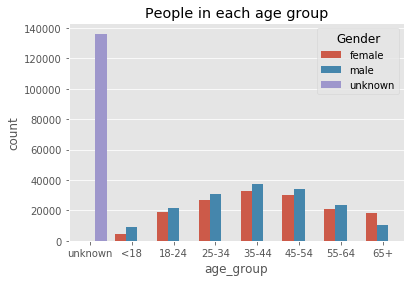

In [18]:
sns.countplot(x='age_group', data=data1, hue='Gender')
plt.title('People in each age group')
plt.show()

### Grouping by age and gender

This is necessary to plot the rest of the distributions in different groups.

In [19]:
grouped = data1.groupby(['age_group', 'Gender'], as_index=False)['Impressions', 'Clicks'].sum()
grouped = grouped.dropna()
grouped

,age_group,Gender,Impressions,Clicks
2,unknown,unknown,685483.0,19480.0
3,<18,female,21800.0,683.0
4,<18,male,47439.0,1382.0
6,18-24,female,95057.0,1002.0
7,18-24,male,108528.0,1165.0
9,25-34,female,136292.0,1388.0
10,25-34,male,154219.0,1549.0
12,35-44,female,166324.0,1707.0
13,35-44,male,189500.0,1955.0
15,45-54,female,151650.0,1542.0


In [20]:
grouped['CTR'] = (grouped.Clicks / grouped.Impressions) * 100
grouped

,age_group,Gender,Impressions,Clicks,CTR
2,unknown,unknown,685483.0,19480.0,2.841792
3,<18,female,21800.0,683.0,3.133028
4,<18,male,47439.0,1382.0,2.913215
6,18-24,female,95057.0,1002.0,1.054104
7,18-24,male,108528.0,1165.0,1.073456
9,25-34,female,136292.0,1388.0,1.018402
10,25-34,male,154219.0,1549.0,1.004416
12,35-44,female,166324.0,1707.0,1.026310
13,35-44,male,189500.0,1955.0,1.031662
15,45-54,female,151650.0,1542.0,1.016815


### Impressions vs age group

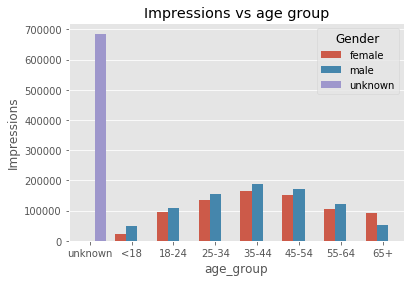

In [21]:
sns.barplot(x='age_group', y='Impressions', data=grouped, hue='Gender')
plt.title('Impressions vs age group')
plt.show()

### Impressions vs gender

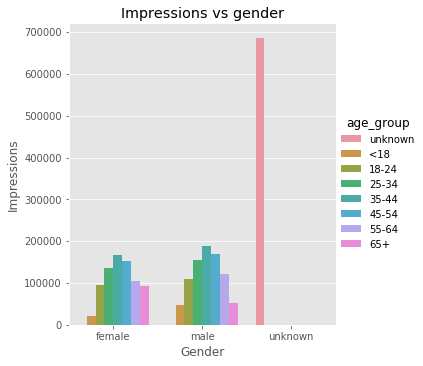

In [22]:
sns.catplot(x='Gender', y='Impressions', kind="bar", data=grouped, hue='age_group')
plt.title('Impressions vs gender')
plt.show()

### CTR vs age group

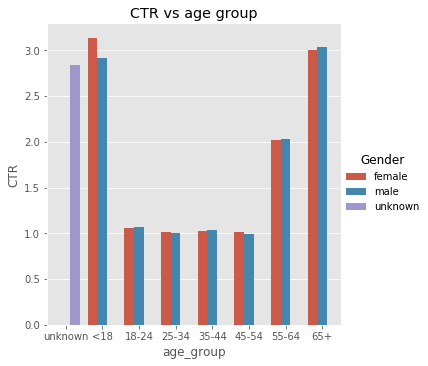

In [23]:
sns.catplot(x='age_group', y='CTR', kind="bar", data=grouped, hue='Gender')
plt.title('CTR vs age group')
plt.show()

### CTR vs gender

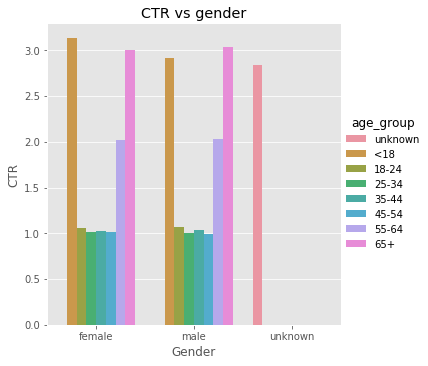

In [24]:
sns.catplot(x='Gender', y='CTR', kind="bar", data=grouped, hue='age_group')
plt.title('CTR vs gender')
plt.show()

### Clicks vs age group

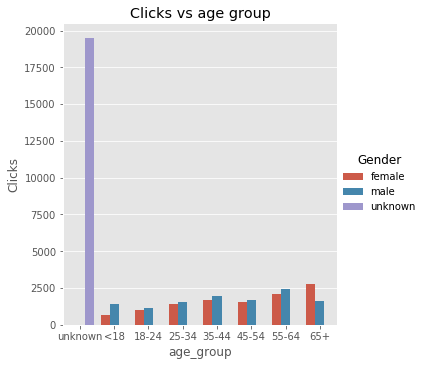

In [25]:
sns.catplot(x='age_group', y='Clicks', kind="bar", data=grouped, hue='Gender')
plt.title('Clicks vs age group')
plt.show()

### Clicks vs gender

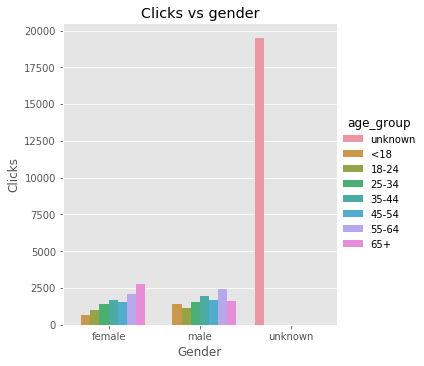

In [26]:
sns.catplot(x='Gender', y='Clicks', kind="bar", data=grouped, hue='age_group')
plt.title('Clicks vs gender')
plt.show()

## Categorizing by log-in
The information whether people logged-in or didn't is contained in the `Signed_In` column. There, `0` means not logged in and `1` means logged in.

In [27]:
data1.Signed_In.value_counts()

1    319198
0    136177
Name: Signed_In, dtype: int64

### Plot count of logged-in and not logged-in

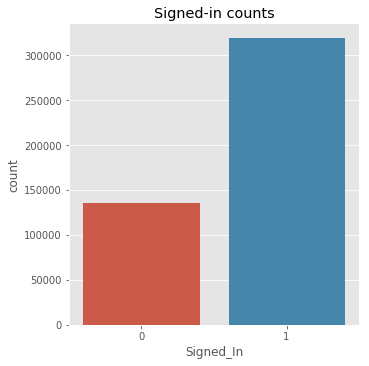

In [28]:
sns.catplot(x='Signed_In', kind='count', data=data1)
plt.title('Signed-in counts')
plt.show()

The last plot shows that almost twice people logged in.

### Plot gender counts and not logged in

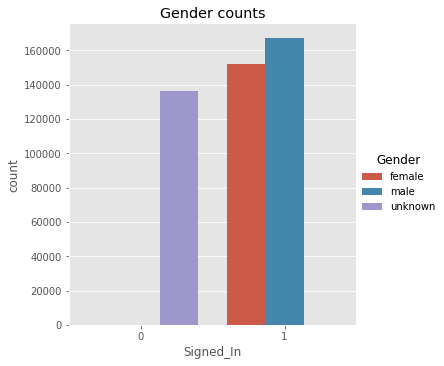

In [29]:
sns.catplot(x='Signed_In', kind='count', data=data1, hue='Gender')
plt.title('Gender counts')
plt.show()

### Analyzing not logged-in data

Let's subset the group of people that did not log in.

In [30]:
unsigned = data1[data1.Signed_In == 0]

In [31]:
unsigned.describe()

,Age,Impressions,Clicks,Signed_In
count,136177.0,136177.000000,136177.000000,136177.0
mean,0.0,5.033765,0.143049,0.0
std,0.0,2.209780,0.386644,0.0
min,0.0,1.000000,0.000000,0.0
25%,0.0,3.000000,0.000000,0.0
50%,0.0,5.000000,0.000000,0.0
75%,0.0,6.000000,0.000000,0.0
max,0.0,18.000000,4.000000,0.0


In [32]:
unsigned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136177 entries, 6 to 458440
Data columns (total 7 columns):
Age            136177 non-null int64
Gender         136177 non-null category
Impressions    136177 non-null int64
Clicks         136177 non-null int64
Signed_In      136177 non-null int64
date           136177 non-null object
age_group      136177 non-null category
dtypes: category(2), int64(4), object(1)
memory usage: 6.5+ MB


In [33]:
unsigned.head()

,Age,Gender,Impressions,Clicks,Signed_In,date,age_group
6,0,unknown,7,1,0,2012/5/1,unknown
10,0,unknown,8,1,0,2012/5/1,unknown
12,0,unknown,4,0,0,2012/5/1,unknown
15,0,unknown,6,0,0,2012/5/1,unknown
19,0,unknown,5,0,0,2012/5/1,unknown


In [34]:
unsigned.Impressions.value_counts()

5     23935
4     23871
6     19994
3     19347
7     14428
2     11591
8      8912
9      5084
1      4676
10     2494
11     1109
12      448
13      193
14       61
15       19
16        7
17        6
18        2
Name: Impressions, dtype: int64

In [35]:
unsigned.Clicks.value_counts()

0    118401
1     16191
2      1475
3       101
4         9
Name: Clicks, dtype: int64

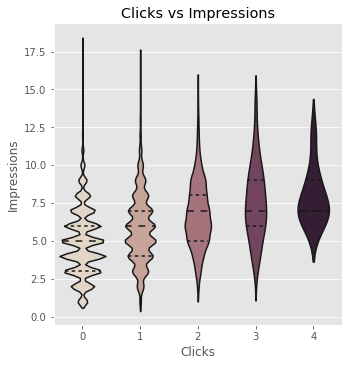

In [36]:
sns.catplot(x='Clicks', y='Impressions', kind='violin', data=unsigned, inner="quartile", palette="ch:.25")
plt.title('Clicks vs Impressions')
plt.show()

In [37]:
unsigned_grouped = unsigned.groupby('Clicks', as_index=False)['Impressions'].sum()
unsigned_grouped

,Clicks,Impressions
0,0,580205
1,1,94477
2,2,9966
3,3,764
4,4,71


In [38]:
unsigned_grouped['CTR'] = (unsigned_grouped.Clicks / unsigned_grouped.Impressions) * 100
unsigned_grouped

,Clicks,Impressions,CTR
0,0,580205,0.000000
1,1,94477,0.001058
2,2,9966,0.020068
3,3,764,0.392670
4,4,71,5.633803


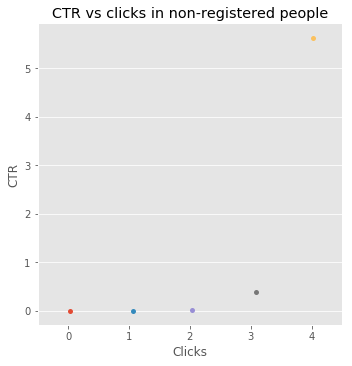

In [39]:
sns.catplot('Clicks', 'CTR', data=unsigned_grouped)
plt.title('CTR vs clicks in non-registered people')
plt.show()

### Plot Clicks vs No-clicks

In [40]:
data1['Clicked'] = data1.Clicks > 0

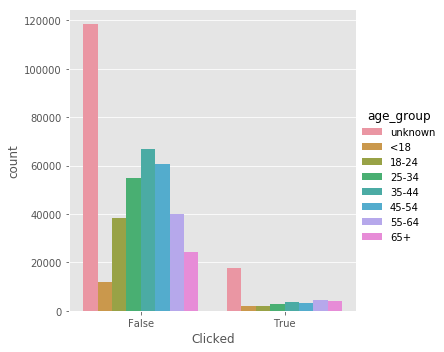

In [41]:
sns.catplot('Clicked', data=data1, hue='age_group', kind='count')
plt.show()

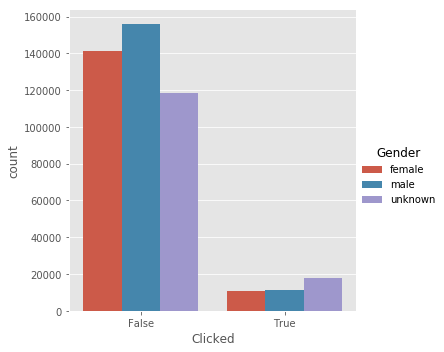

In [42]:
sns.catplot('Clicked', data=data1, hue='Gender', kind='count')
plt.show()

## Merging all days into a single data frame

Here, the purpose is to get all the data from 1 May 2012 to 31 May 2012.
The order should be as fallows:
1. Get one `.csv` file.
2. Add a column with the `date` it was recorded.
3. Repeat these steps in a loop for the 31 `.csv` files.
4. Merge the 31 `.csv` files into a single `DataFrame`.

In [43]:
url_name = 'http://stat.columbia.edu/~rachel/datasets/nyt{}.csv'

In [44]:
def monthly_reader(url, start, end):
    '''Reads csv files from a given url for every number from start to end
    and returns a data frame'''
    dfs_list = []
    for i in range(start, end+1):
        dfi = pd.read_csv(url.format(i))
        dfi['date'] = '2012/5/{}'.format(i)
        dfs_list.append(dfi)
    return pd.concat(dfs_list, ignore_index=True)

In [45]:
df = monthly_reader(url_name, 1, 31)

In [46]:
df.head()

,Age,Gender,Impressions,Clicks,Signed_In,date
0,36,0,3,0,1,2012/5/1
1,73,1,3,0,1,2012/5/1
2,30,0,3,0,1,2012/5/1
3,49,1,3,0,1,2012/5/1
4,47,1,11,0,1,2012/5/1


In [47]:
df.sample(5)

,Age,Gender,Impressions,Clicks,Signed_In,date
850963,28,0,3,0,1,2012/5/2
2435810,0,0,5,0,0,2012/5/6
5092437,0,0,6,0,0,2012/5/11
7101384,42,1,8,0,1,2012/5/15
1969202,0,0,5,0,0,2012/5/5


In [48]:
df.tail()

,Age,Gender,Impressions,Clicks,Signed_In,date
14905860,41,1,4,0,1,2012/5/31
14905861,0,0,5,0,0,2012/5/31
14905862,22,1,3,0,1,2012/5/31
14905863,59,0,5,1,1,2012/5/31
14905864,29,1,4,0,1,2012/5/31


In [49]:
df.shape

(14905865, 6)

The shape of the data frame and the last index confirm the merge was done correctly and also the indexing.
### Cleaning the merged data frame
Now let's clean the complete data frame, that is:
1. Remove observations with `0` impressions.
2. Assign `'unknown'` gender for observations with unlogged people.
3. Create `'unknown'` age group for observations with unlogged people.

In [50]:
# Select only observations with impressions greater than 0.
df = df[df['Impressions'] > 0]

# Assign 'unknown' for people that did not sign in, 
#        'male' for 1 and 'famele' for 0.
df.loc[df.Gender == 1, 'Gender'] = 'male'
df.loc[df.Gender == 0, 'Gender'] = 'female'
df.loc[df.Signed_In == 0, 'Gender'] = 'unknown'

# Create groups according to ages.
bins = [0, 1, 18, 25, 35, 45, 55, 65, np.Inf]
labels = ['unknown', '<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['age_group'] = pd.cut(df.Age, bins=bins, labels=labels, right=False)

# Setting dtypes for each column to improve memory usage and speed.
df = df.astype({'age_group':'category',
               'Gender':'category',
                'Signed_In':'bool',
               'date':'datetime64[ns]'})

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14805865 entries, 0 to 14905864
Data columns (total 7 columns):
Age            int64
Gender         category
Impressions    int64
Clicks         int64
Signed_In      bool
date           datetime64[ns]
age_group      category
dtypes: bool(1), category(2), datetime64[ns](1), int64(3)
memory usage: 607.2 MB


In [52]:
df.describe()

,Age,Impressions,Clicks
count,1.480586e+07,1.480586e+07,1.480586e+07
mean,2.624290e+01,5.033280e+00,9.839128e-02
std,2.412952e+01,2.205137e+00,3.199722e-01
min,0.000000e+00,1.000000e+00,0.000000e+00
25%,0.000000e+00,3.000000e+00,0.000000e+00
50%,2.600000e+01,5.000000e+00,0.000000e+00
75%,4.600000e+01,6.000000e+00,0.000000e+00
max,1.150000e+02,2.100000e+01,6.000000e+00


In [53]:
df.memory_usage()

Index          118446920
Age            118446920
Gender          14805969
Impressions    118446920
Clicks         118446920
Signed_In       14805865
date           118446920
age_group       14806249
dtype: int64

In [54]:
df.head()

,Age,Gender,Impressions,Clicks,Signed_In,date,age_group
0,36,female,3,0,True,2012-05-01,35-44
1,73,male,3,0,True,2012-05-01,65+
2,30,female,3,0,True,2012-05-01,25-34
3,49,male,3,0,True,2012-05-01,45-54
4,47,male,11,0,True,2012-05-01,45-54


In [55]:
df.sample(5)

,Age,Gender,Impressions,Clicks,Signed_In,date,age_group
11168131,0,unknown,4,0,False,2012-05-24,unknown
5975253,0,unknown,5,0,False,2012-05-13,unknown
65562,58,male,5,0,True,2012-05-01,55-64
12535465,0,unknown,7,0,False,2012-05-27,unknown
1870458,84,female,1,0,True,2012-05-05,65+


In [56]:
df.tail()

,Age,Gender,Impressions,Clicks,Signed_In,date,age_group
14905860,41,male,4,0,True,2012-05-31,35-44
14905861,0,unknown,5,0,False,2012-05-31,unknown
14905862,22,male,3,0,True,2012-05-31,18-24
14905863,59,female,5,1,True,2012-05-31,55-64
14905864,29,male,4,0,True,2012-05-31,25-34


In [57]:
df_grouped = df.groupby(['date', 'age_group', 'Gender', 'Signed_In'], as_index=False)['Impressions', 'Clicks'].sum()

In [58]:
df_grouped.dropna(inplace=True)

In [59]:
df_grouped['CTR'] = (df_grouped.Clicks / df_grouped.Impressions) * 100

In [60]:
df_grouped.head()

,date,age_group,Gender,Signed_In,Impressions,Clicks,CTR
4,2012-05-01,unknown,unknown,False,685483.0,19480.0,2.841792
7,2012-05-01,<18,female,True,21800.0,683.0,3.133028
9,2012-05-01,<18,male,True,47439.0,1382.0,2.913215
13,2012-05-01,18-24,female,True,95057.0,1002.0,1.054104
15,2012-05-01,18-24,male,True,108528.0,1165.0,1.073456


In [61]:
df_grouped.sample(10)

,date,age_group,Gender,Signed_In,Impressions,Clicks,CTR
1117,2012-05-24,18-24,female,True,73019.0,824.0,1.128473
715,2012-05-15,65+,female,True,70208.0,2016.0,2.871468
1291,2012-05-27,65+,female,True,118465.0,3553.0,2.999198
969,2012-05-21,<18,male,True,37536.0,1043.0,2.778666
459,2012-05-10,35-44,male,True,182847.0,1777.0,0.971851
1465,2012-05-31,35-44,female,True,162336.0,1647.0,1.014562
7,2012-05-01,<18,female,True,21800.0,683.0,3.133028
367,2012-05-08,45-54,female,True,151059.0,1451.0,0.960552
1429,2012-05-30,55-64,female,True,84995.0,1681.0,1.977763
793,2012-05-17,35-44,female,True,124930.0,1224.0,0.979749


In [62]:
df_grouped.tail()

,date,age_group,Gender,Signed_In,Impressions,Clicks,CTR
1473,2012-05-31,45-54,male,True,157481.0,1578.0,1.002026
1477,2012-05-31,55-64,female,True,103821.0,2127.0,2.048718
1479,2012-05-31,55-64,male,True,111429.0,2273.0,2.039864
1483,2012-05-31,65+,female,True,88676.0,2676.0,3.017727
1485,2012-05-31,65+,male,True,49105.0,1485.0,3.024132


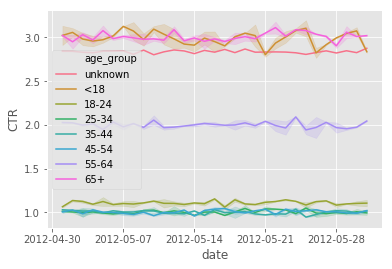

In [63]:
sns.lineplot(x='date', y='CTR', data=df_grouped, hue='age_group');

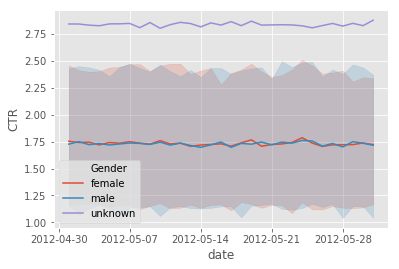

In [64]:
sns.lineplot(x='date', y='CTR', data=df_grouped, hue='Gender');